In [4]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/world-economic-classifications/World Economic Classifications v2.csv


# **Import**

In [5]:
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns

from plotly.subplots import make_subplots
import plotly.graph_objects as go

import warnings
warnings.filterwarnings("ignore")

# **1. Data Import & Structure**

In [7]:
df = pd.read_csv('/kaggle/input/world-economic-classifications/World Economic Classifications v2.csv')

In [8]:
df.shape

(205, 9)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   country_name      205 non-null    object 
 1   un_class_2014     167 non-null    object 
 2   imf_class_2023    193 non-null    object 
 3   g7                205 non-null    object 
 4   eu_member         205 non-null    object 
 5   fuel_exp_country  205 non-null    object 
 6   wealth_rank       178 non-null    float64
 7   gdp_ppp_2022      175 non-null    object 
 8   gdp_pc_2022       176 non-null    object 
dtypes: float64(1), object(8)
memory usage: 14.5+ KB


**Missing Value Check**

In [11]:
df.isnull().sum()

country_name         0
un_class_2014       38
imf_class_2023      12
g7                   0
eu_member            0
fuel_exp_country     0
wealth_rank         27
gdp_ppp_2022        30
gdp_pc_2022         29
dtype: int64

**Duplicated value check**

In [12]:
df.duplicated().sum()

0

In [13]:
df.head()

,country_name,un_class_2014,imf_class_2023,g7,eu_member,fuel_exp_country,wealth_rank,gdp_ppp_2022,gdp_pc_2022
0,Luxembourg,Developed,Advanced,No,Yes,No,1.0,"$142,214.00","$127,046.00"
1,Singapore,Developing,Advanced,No,No,No,2.0,"$127,565.00","$78,115.00"
2,Ireland,Developed,Advanced,No,Yes,No,3.0,"$126,905.00","$105,362.00"
3,Norway,Developed,Advanced,No,No,No,4.0,"$114,899.00","$106,594.00"
4,Qatar,Developing,Emerging,No,No,Yes,5.0,"$114,648.00","$88,046.00"


# **2. Data Trasnfrom**

In [14]:
gdp = ['gdp_ppp_2022', 'gdp_pc_2022']

In [15]:
df[gdp] = df[gdp].replace('[\$,]', '', regex=True).astype(float)

**Data Check**

In [16]:
df.head()

,country_name,un_class_2014,imf_class_2023,g7,eu_member,fuel_exp_country,wealth_rank,gdp_ppp_2022,gdp_pc_2022
0,Luxembourg,Developed,Advanced,No,Yes,No,1.0,142214.0,127046.0
1,Singapore,Developing,Advanced,No,No,No,2.0,127565.0,78115.0
2,Ireland,Developed,Advanced,No,Yes,No,3.0,126905.0,105362.0
3,Norway,Developed,Advanced,No,No,No,4.0,114899.0,106594.0
4,Qatar,Developing,Emerging,No,No,Yes,5.0,114648.0,88046.0


# **3. Data Visualization**

In [19]:
num_cols = df.select_dtypes(include = ['int64','float64']).columns
cat_cols = df.select_dtypes(include = ['object']).columns

**Histogram**

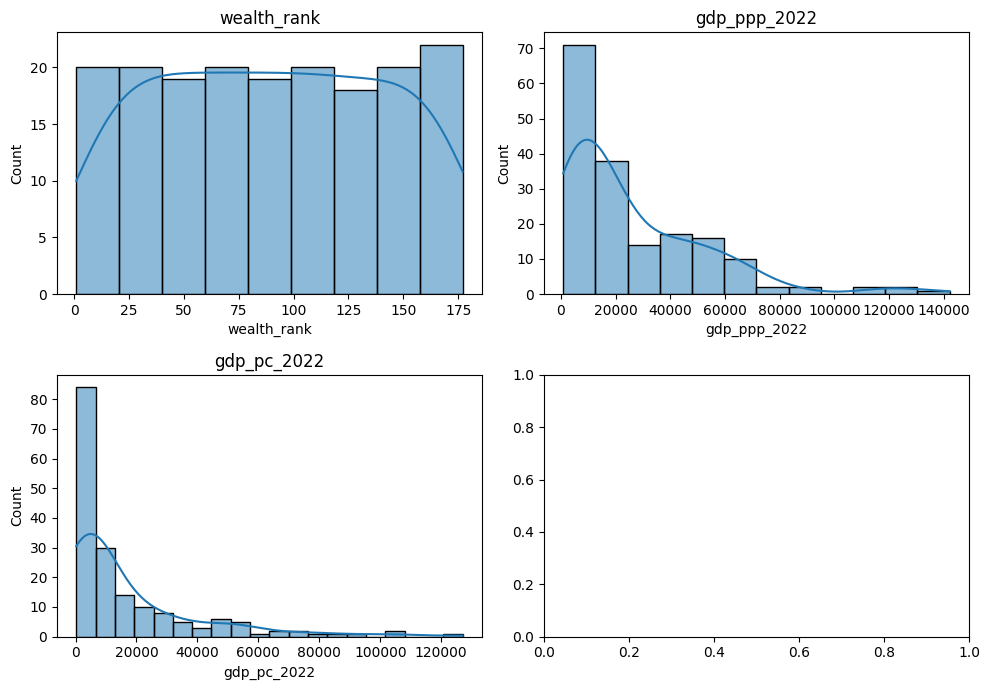

In [23]:
f, ax = plt.subplots(2,2 , figsize=(10, 7))
ax = ax.flatten()

for index, cols in enumerate(num_cols):
    sns.histplot(data= df, x= cols, ax = ax[index],kde=True)
    ax[index].set_title(cols)
    
plt.tight_layout()
plt.show() 

**Countplot**

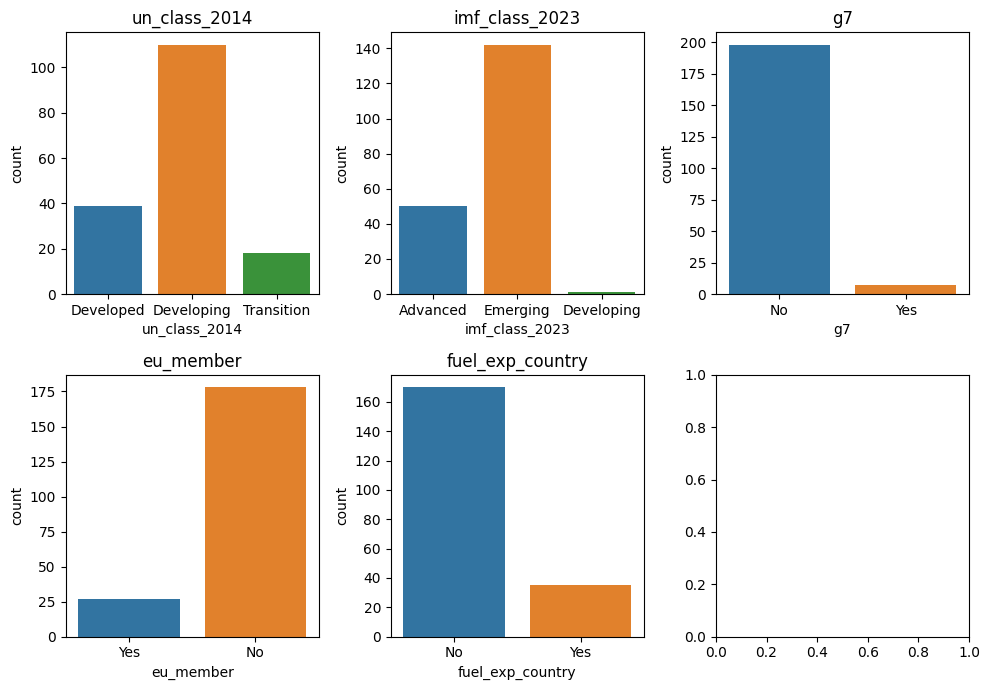

In [27]:
f, ax = plt.subplots(2,3 , figsize=(10, 7))
ax = ax.flatten()

for index, cols in enumerate(cat_cols[1:7]):
    sns.countplot(data= df, x= cols, ax = ax[index])
    ax[index].set_title(cols)
    
plt.tight_layout()
plt.show() 

-------

**g7 GDP**

In [48]:
g7= df[df['g7'] == 'Yes'].sort_values('gdp_pc_2022',ascending = False)

In [49]:
g7

,country_name,un_class_2014,imf_class_2023,g7,eu_member,fuel_exp_country,wealth_rank,gdp_ppp_2022,gdp_pc_2022
7,United States,Developed,Advanced,Yes,No,No,8.0,76399.0,75269.0
21,Canada,Developed,Advanced,Yes,No,No,22.0,58400.0,55646.0
16,Germany,Developed,Advanced,Yes,Yes,No,17.0,63150.0,48845.0
26,United Kingdom,Developed,Advanced,Yes,No,No,27.0,54603.0,45485.0
24,France,Developed,Advanced,Yes,Yes,No,25.0,55493.0,43061.0
37,Japan,Developed,Advanced,Yes,No,No,38.0,45573.0,34135.0
28,Italy,Developed,Advanced,Yes,Yes,No,29.0,51865.0,34053.0


In [50]:
px.bar(g7, x= 'country_name',y='gdp_pc_2022', barmode = 'group', title = 'G7 GDP', text_auto = True, template='plotly_dark')

**G7 GDP(PPP)**

In [51]:
g7= df[df['g7'] == 'Yes'].sort_values('gdp_ppp_2022',ascending = False)

In [52]:
g7

,country_name,un_class_2014,imf_class_2023,g7,eu_member,fuel_exp_country,wealth_rank,gdp_ppp_2022,gdp_pc_2022
7,United States,Developed,Advanced,Yes,No,No,8.0,76399.0,75269.0
16,Germany,Developed,Advanced,Yes,Yes,No,17.0,63150.0,48845.0
21,Canada,Developed,Advanced,Yes,No,No,22.0,58400.0,55646.0
24,France,Developed,Advanced,Yes,Yes,No,25.0,55493.0,43061.0
26,United Kingdom,Developed,Advanced,Yes,No,No,27.0,54603.0,45485.0
28,Italy,Developed,Advanced,Yes,Yes,No,29.0,51865.0,34053.0
37,Japan,Developed,Advanced,Yes,No,No,38.0,45573.0,34135.0


In [53]:
px.bar(g7, x= 'country_name',y='gdp_ppp_2022', barmode = 'group', title = 'G7 GDP(PPP)', text_auto = True, template='plotly_dark')

---------

**imp_class_2023 average gdp by category**

In [55]:
ic_2023_avg_gdp = df.groupby(['imf_class_2023'])['gdp_ppp_2022'].mean().reset_index().sort_values(by = 'gdp_ppp_2022', ascending=False)

In [56]:
ic_2023_avg_gdp

,imf_class_2023,gdp_ppp_2022
0,Advanced,60176.340909
2,Emerging,15167.285714
1,Developing,14125.000000


In [58]:
fig = px.pie(ic_2023_avg_gdp, values = 'gdp_ppp_2022', names='imf_class_2023',title = 'imp_class_2023 average gdp(ppp) by category')
fig.update_traces(textposition='outside',textinfo='label + percent + value')

**imp_class_2023 average gdp by category**

In [59]:
ic_2023_avg_gdp2 = df.groupby(['imf_class_2023'])['gdp_pc_2022'].mean().reset_index().sort_values(by = 'gdp_pc_2022', ascending=False)

In [60]:
ic_2023_avg_gdp2

,imf_class_2023,gdp_pc_2022
0,Advanced,44734.111111
2,Emerging,7370.674603
1,Developing,5317.000000


In [61]:
fig = px.pie(ic_2023_avg_gdp2, values = 'gdp_pc_2022', names='imf_class_2023',title = 'imp_class_2023 average gdp by category')
fig.update_traces(textposition='outside',textinfo='label + percent + value')

-------

**Fuel exporter country GDP(PPP) TOP10**

In [70]:
fuelcountry_gdp = df[df['fuel_exp_country'] == 'Yes'].sort_values('gdp_ppp_2022',ascending = False)[0:10]

In [71]:
fuelcountry_gdp

,country_name,un_class_2014,imf_class_2023,g7,eu_member,fuel_exp_country,wealth_rank,gdp_ppp_2022,gdp_pc_2022
4,Qatar,Developing,Emerging,No,No,Yes,5.0,114648.0,88046.0
5,United Arab Emirates (UAE),Transition,Advanced,No,No,Yes,6.0,87729.0,53758.0
10,Brunei Darussalam,Developing,Emerging,No,No,Yes,11.0,69275.0,37152.0
18,Bahrain,Developing,Emerging,No,No,Yes,19.0,61228.0,30152.0
19,Saudi Arabia,Developing,Emerging,No,No,Yes,20.0,59065.0,30436.0
22,Kuwait,Developing,Emerging,No,No,Yes,23.0,58056.0,43233.0
23,Malta,Developed,Advanced,No,Yes,Yes,24.0,55928.0,33313.0
41,Oman,Developing,Emerging,No,No,Yes,42.0,41724.0,25057.0
51,Russian Federation (Russia),Transition,Emerging,No,No,Yes,52.0,36485.0,15482.0
59,Trinidad and Tobago,Developing,Emerging,No,No,Yes,60.0,27778.0,18222.0


In [72]:
px.bar(fuelcountry_gdp, y= 'country_name',x='gdp_ppp_2022', barmode = 'group', title = 'Fuel exporter country GDP(PPP) TOP10', text_auto = True, template='plotly_dark')

**Fuel exporter country GDP TOP10**

In [73]:
fuelcountry_gdp2 = df[df['fuel_exp_country'] == 'Yes'].sort_values('gdp_pc_2022',ascending = False)[0:10]

In [76]:
px.bar(fuelcountry_gdp2, y= 'country_name',x='gdp_pc_2022', barmode = 'group', title = 'Fuel exporter country GDP TOP10', text_auto = True, template='plotly_dark')

--------

**eu_member country GDP(PPP) TOP10**

In [78]:
eu_member_gdp = df[df['eu_member'] == 'Yes'].sort_values('gdp_ppp_2022',ascending = False)[0:10]

In [79]:
eu_member_gdp

,country_name,un_class_2014,imf_class_2023,g7,eu_member,fuel_exp_country,wealth_rank,gdp_ppp_2022,gdp_pc_2022
0,Luxembourg,Developed,Advanced,No,Yes,No,1.0,142214.0,127046.0
2,Ireland,Developed,Advanced,No,Yes,No,3.0,126905.0,105362.0
8,Denmark,Developed,Advanced,No,Yes,No,9.0,74005.0,67220.0
9,Netherlands,Developed,Advanced,No,Yes,No,10.0,69577.0,56429.0
13,Austria,Developed,Advanced,No,Yes,No,14.0,67936.0,52732.0
14,Belgium,Developed,Advanced,No,Yes,No,15.0,65027.0,49640.0
15,Sweden,Developed,Advanced,No,Yes,No,16.0,64578.0,55543.0
16,Germany,Developed,Advanced,Yes,Yes,No,17.0,63150.0,48845.0
20,Finland,Developed,Advanced,No,Yes,No,21.0,59027.0,50684.0
23,Malta,Developed,Advanced,No,Yes,Yes,24.0,55928.0,33313.0


In [80]:
px.bar(eu_member_gdp, y= 'country_name',x='gdp_ppp_2022', barmode = 'group', title = 'eu_member country GDP(PPP) TOP10', text_auto = True, template='plotly_dark')

**eu_member country GDP TOP10**

In [81]:
eu_member_gdp2 = df[df['eu_member'] == 'Yes'].sort_values('gdp_pc_2022',ascending = False)[0:10]

In [82]:
eu_member_gdp2

,country_name,un_class_2014,imf_class_2023,g7,eu_member,fuel_exp_country,wealth_rank,gdp_ppp_2022,gdp_pc_2022
0,Luxembourg,Developed,Advanced,No,Yes,No,1.0,142214.0,127046.0
2,Ireland,Developed,Advanced,No,Yes,No,3.0,126905.0,105362.0
8,Denmark,Developed,Advanced,No,Yes,No,9.0,74005.0,67220.0
9,Netherlands,Developed,Advanced,No,Yes,No,10.0,69577.0,56429.0
15,Sweden,Developed,Advanced,No,Yes,No,16.0,64578.0,55543.0
13,Austria,Developed,Advanced,No,Yes,No,14.0,67936.0,52732.0
20,Finland,Developed,Advanced,No,Yes,No,21.0,59027.0,50684.0
14,Belgium,Developed,Advanced,No,Yes,No,15.0,65027.0,49640.0
16,Germany,Developed,Advanced,Yes,Yes,No,17.0,63150.0,48845.0
24,France,Developed,Advanced,Yes,Yes,No,25.0,55493.0,43061.0


In [83]:
px.bar(eu_member_gdp2, y= 'country_name',x='gdp_pc_2022', barmode = 'group', title = 'eu_member country GDP TOP10', text_auto = True, template='plotly_dark')

-----------------

**Please leave your advice in the comments. Thank you**